In [1]:
import pandas as pd
df=pd.read_csv(r'iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
df = df.rename(columns={0: 'sepal length', 1: 'sepal width', 2: 'petal length', 3: 'petal width', 4: 'class'})
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop('class', axis=1, inplace=True)

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x=df.iloc[:]
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


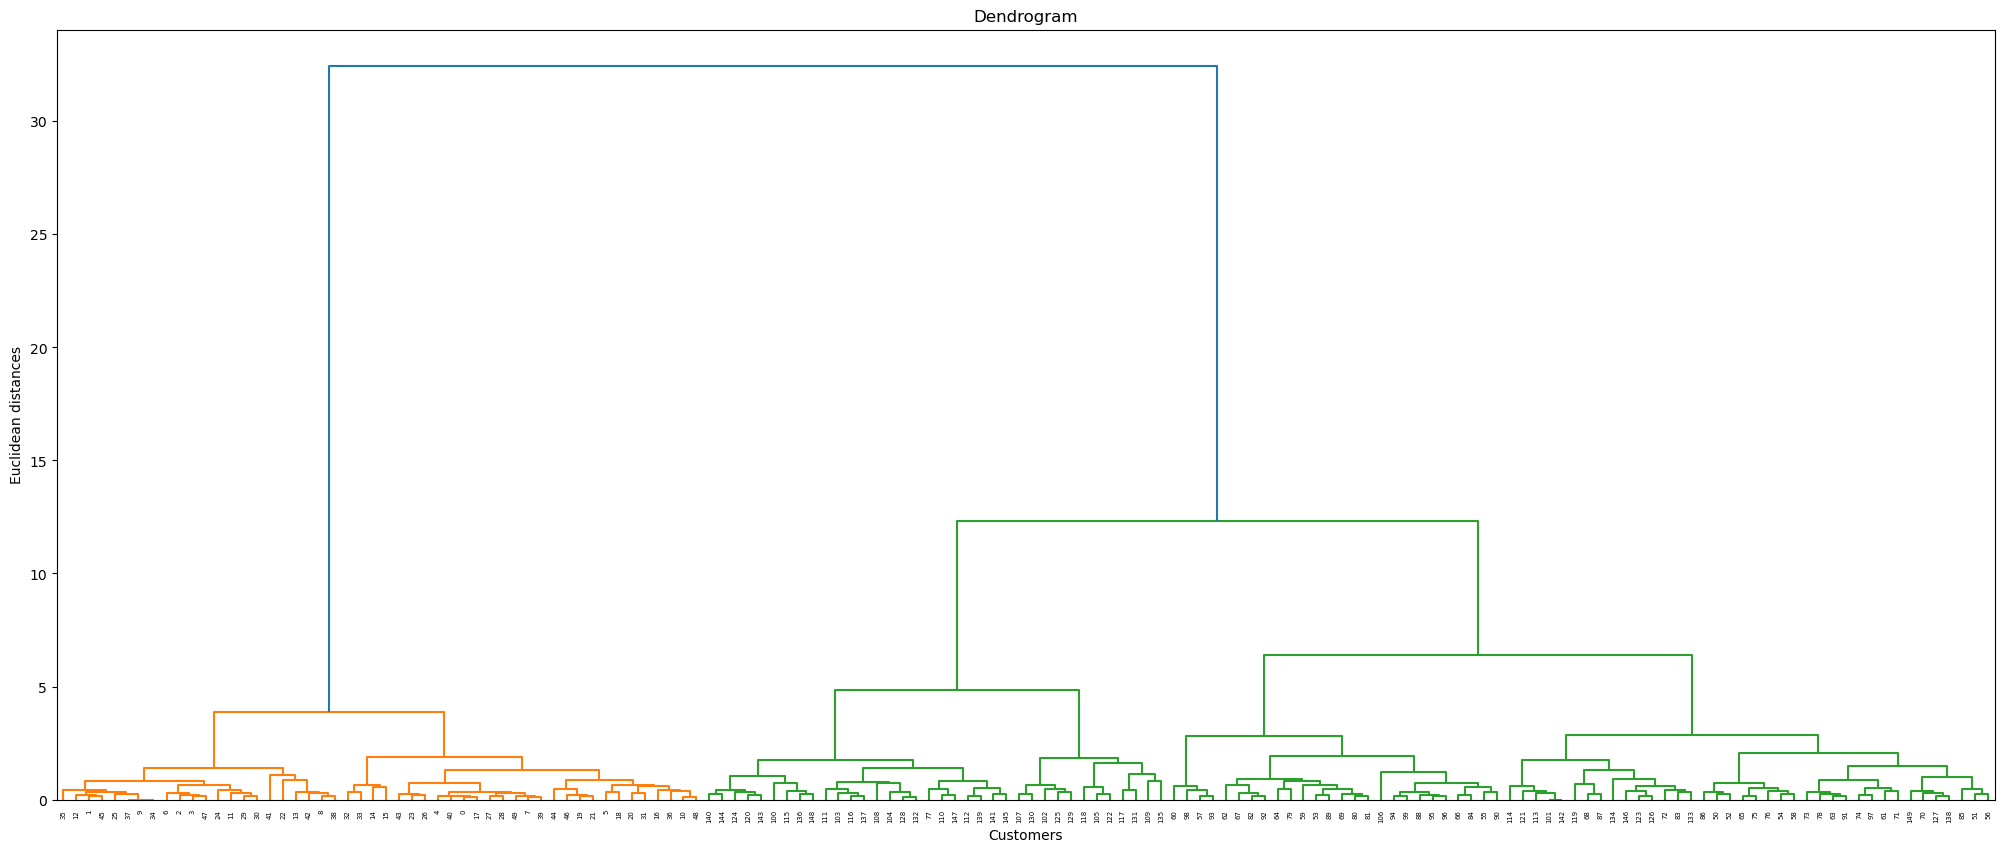

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

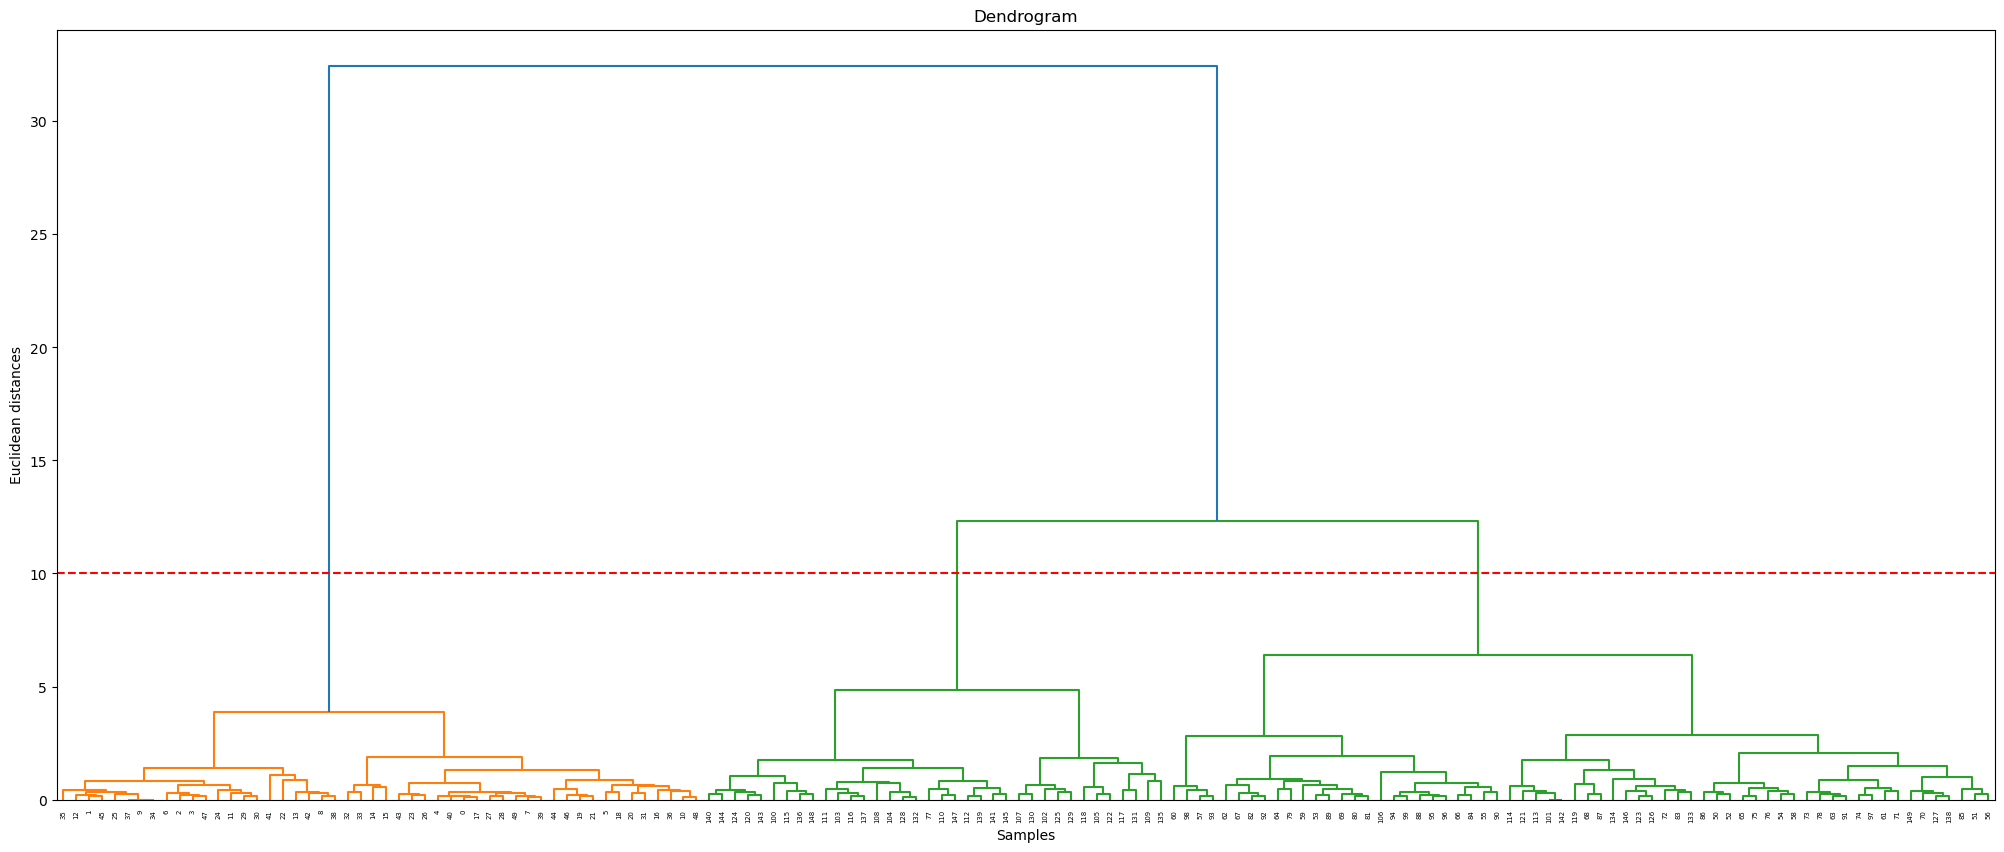

In [7]:
plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(x, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.axhline(y=10, color='r',linestyle='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threeshold.
No. of cluster=3

In [35]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)  # Adjust n_clusters as needed
agglo_labels = agglo.fit_predict(x_pca)

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(x_pca)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00,  2.34838514e-01],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00,  2.34838514e-01],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00,  2.34838514e-01],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00

In [38]:
x_scaled=pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,sepal length,sepal width,petal length,petal width,labels
0,-0.900681,1.032057,-1.341272,-1.312977,0.234839
1,-1.143017,-0.124958,-1.341272,-1.312977,0.234839
2,-1.385353,0.337848,-1.398138,-1.312977,0.234839
3,-1.506521,0.106445,-1.284407,-1.312977,0.234839
4,-1.021849,1.263460,-1.341272,-1.312977,0.234839


PCA

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [40]:
x_pca=pd.DataFrame(data=x_pca, columns=['PC1','PC2'])
x_pca['KMeans_Cluster']=kmeans_labels
x_pca['Agglo_Cluster']=agglo_labels
x_pca.head()

,PC1,PC2,KMeans_Cluster,Agglo_Cluster
0,-2.190215,0.800068,2,2
1,-2.054485,-0.022399,2,2
2,-2.321297,0.245134,2,2
3,-2.267281,0.059042,2,2
4,-2.307270,0.931931,2,2


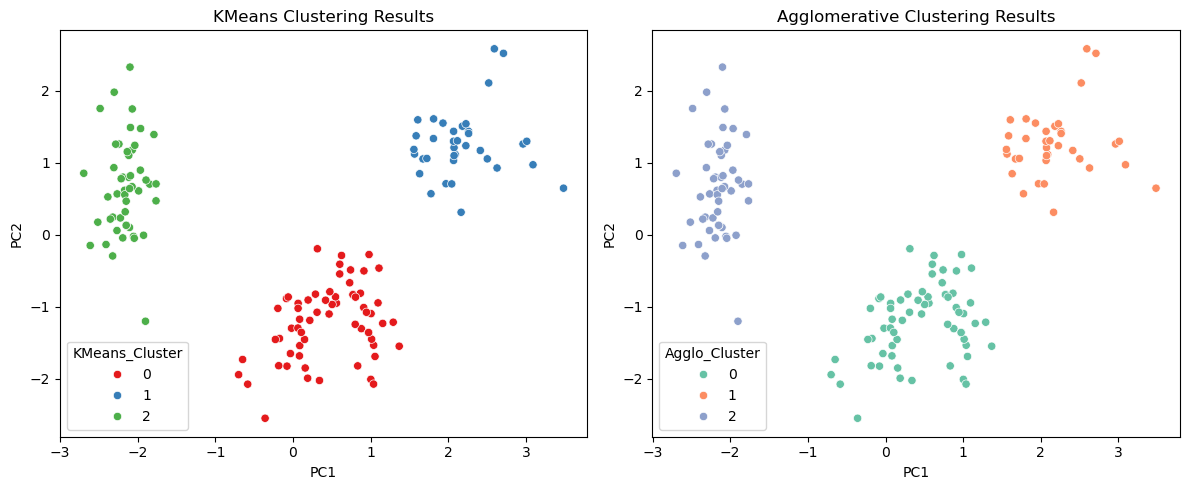

In [44]:
import seaborn as sns
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=x_pca, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set1')
plt.title("KMeans Clustering Results")

plt.subplot(1,2,2)
sns.scatterplot(data=x_pca, x='PC1', y='PC2', hue='Agglo_Cluster', palette='Set2')
plt.title("Agglomerative Clustering Results")

plt.tight_layout()
plt.show()